## 예제 15-1-1  자연어 처리 모듈 알아보기

## 형태소 분석하기

https://steemit.com/busy/@anpigon/5s1aam

## 형태소 분석 메뉴얼

 http://konlpy.org/en/latest/

In [1]:
import warnings                                     ## 경고메시지를 제어하는 모듈을 사용한다 
warnings.filterwarnings(action='ignore')            ## 경고메시지를 출력되지 않도록 처리한다 

In [2]:
import konlpy as ko                                    ## 한국어 자연어 처리하는 모듈을 사용한다 

In [3]:
from konlpy.corpus import kolaw, kobill               ##  한국어 코퍼스 내의 문장을 사용한다 

In [4]:
kolaw.fileids()                                     ## 헌법에 대한 텍스트 파일을 확인한다. 

['constitution.txt']

In [5]:
kobill.fileids()                                   ## 일반 법률에 대한 텍스트 파일을 확인한다 

['1809896.txt',
 '1809897.txt',
 '1809895.txt',
 '1809894.txt',
 '1809890.txt',
 '1809891.txt',
 '1809893.txt',
 '1809892.txt',
 '1809899.txt',
 '1809898.txt']

In [6]:
c = kolaw.open('constitution.txt').read()       ## 헌법 문서를 읽어온다 

In [7]:
con = c.split('\n\n')                         ##  내부의 문장을 분리해서 리스트로 보관한다 

In [8]:
con[0]                                        ## 첫번째 리스트 원소를 확인하면 헌법 제목이 나온다 

'대한민국헌법'

In [9]:
con_sen = con[1]                              ## 실제 헌법에 대한 전문 문장을 가져온다 

In [10]:
from konlpy.tag import Kkma                  ## 형태소를 분리하는 모듈을 사용한다 
kkma = Kkma()                               ## 형태소 객체를 하나 만든다 

## 문장분석하기

In [11]:
kkma.sentences(con_sen)                      ## 문장을 분리하지만 하나의 문장이라서 리스트 내에 하나의 문자열만 표시한다 

['유구한 역사와 전통에 빛나는 우리 대한 국민은 3·1 운동으로 건립된 대한민국 임시정부의 법통과 불의에 항거한 4·19 민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의· 인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유 민주적 기본질서를 더욱 확고히 하여 정치· 경제· 사회· 문화의 모든 영역에 있어서 각인의 기회를 균등 히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류 공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.']

## 명사 분석하기

In [12]:
con_sen_n = kkma.nouns(con_sen)             ##  명사를 기준으로 분리한다. 

In [13]:
con_sen_n[:10]                              ## 분리한 명사를 10개만 확인한다. 
                                            ## 분리된 단어가 일부 겹치는 것을 확인할 수 있다. 

['유구', '역사', '전통', '우리', '국민', '3', '1', '1운동', '운동', '건립']

## 형태소 분석하기

In [14]:
con_sen_m = kkma.morphs(con_sen)             ## 한글을 형태소 별로 분리하면 접사와 조사가 분리되는 것을 볼 수 있다 

In [15]:
con_sen_m[:10]

['유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛나', '는', '우리']

In [16]:
con_sen_p = kkma.pos(con_sen)                     ## 분리된 형태소의 품사를  표시한다. 

In [17]:
con_sen_p[:10]                                    ## 품사표시가 형태소 분리된 기준으로 영어로 표시된다.

[('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM')]

## 한나눔 형태소 분석기 사용하기

In [18]:
from konlpy.tag import Hannanum             ## 다른 형태소 분석하는 클래스를 사용한다 

In [19]:
hannanum = Hannanum()                       ## 형태소 분리를 위해 객체를 만든다. 

In [20]:
hannanum.nouns('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')      ## 문자열로 문장을 넣어 명사를 분리한다 

['이것', '형태소', '분석기', '아버지', '방']

In [21]:
hannanum.morphs('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')      ## 형태소도 분석한다. 

['이것',
 '은',
 '형태소',
 '분석기',
 '일',
 'ㅂ니다',
 '아버지',
 '가',
 '방',
 '에',
 '들',
 '어',
 '가',
 '시ㄴ다']

In [22]:
hannanum.pos('이것은 형태소 분석기 입니다 아버지가 방에 들어가신다')      ## 형태소별로 품사를 확인한다. 

[('이것', 'N'),
 ('은', 'J'),
 ('형태소', 'N'),
 ('분석기', 'N'),
 ('일', 'P'),
 ('ㅂ니다', 'E'),
 ('아버지', 'N'),
 ('가', 'J'),
 ('방', 'N'),
 ('에', 'J'),
 ('들', 'P'),
 ('어', 'E'),
 ('가', 'P'),
 ('시ㄴ다', 'E')]

## Open Korean Text 형태소 분석기

In [23]:
from konlpy.tag import Okt                                  ## 다른 형태소를 클래스를 가져온다. 
okt = Okt()
okt.nouns('이것은 형태소 분석기 입니다 아버지가방에들어가신다')  ## 형태소 분석으로 명사를 추출한다.
                                                                 ##  한글을 명사로 분리하는 기준이 차이가 있는 것을 볼 수 있다. 

['것', '형태소', '분석', '기', '아버지', '가방']

In [24]:
okt.morphs('이것은 형태소 분석기 입니다 아버지가방에들어가신다')        ## 형태소도 분리하는 기준이 차이가 있다 

['이', '것', '은', '형태소', '분석', '기', '입니다', '아버지', '가방', '에', '들어가신다']

In [25]:
okt.pos('이것은 형태소 분석기 입니다 아버지가방에들어가신다')           ## 형태소 분리대로 품사를 표시한다. 

[('이', 'Determiner'),
 ('것', 'Noun'),
 ('은', 'Josa'),
 ('형태소', 'Noun'),
 ('분석', 'Noun'),
 ('기', 'Noun'),
 ('입니다', 'Adjective'),
 ('아버지', 'Noun'),
 ('가방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb')]

In [26]:
text = "이것은 형태소 분석기 입니다 아버지가방에들어가신다"

print(okt.morphs(text))
print(okt.morphs(text, stem=True))              ## 형태소를 분리하면서 특정 단어의 어간을 표시하면 동사일때 기본형태로 변환된다 

['이', '것', '은', '형태소', '분석', '기', '입니다', '아버지', '가방', '에', '들어가신다']
['이', '것', '은', '형태소', '분석', '기', '이다', '아버지', '가방', '에', '들어가다']


In [27]:
okt.phrases(text)                            ## 특정 구별로 분리도 가능하다

['이것', '형태소', '형태소 분석기', '아버지가방', '분석', '아버지', '가방']

In [28]:
import pandas as pd                ## 판다스 모듈을 사용한다 

## 코모란 형태소 분석기

In [29]:
from konlpy.tag import Komoran                    ## 다른 형태소 분석을 하는 클래스를 사용한다 
komoran = Komoran()
komoran.nouns('이것은 형태소 분석기 입니다 아버지가방에들어가신다')        ## 명사를 추출한다. 
                                                                           ## 띄어쓰기를 하지않으면 연결된 단어로 명사를 분리한다 

['형태소', '분석기', '아버지', '가방']

In [30]:
komoran.morphs('이것은 형태소 분석기 입니다 아버지가방에들어가신다')                ## 형태소로 분리한다 

['이것', '은', '형태소', '분석기', '이', 'ㅂ니다', '아버지', '가방', '에', '들어가', '시', 'ㄴ다']

In [31]:
komoran.pos('이것은 형태소 분석기 입니다 아버지가방에들어가신다')       ## 형태소에 맞는 품사를 표시한다 

[('이것', 'NP'),
 ('은', 'JX'),
 ('형태소', 'NNP'),
 ('분석기', 'NNG'),
 ('이', 'VV'),
 ('ㅂ니다', 'EC'),
 ('아버지', 'NNG'),
 ('가방', 'NNP'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ㄴ다', 'EC')]

## 품사 정보 알아보기

In [32]:
okt.tagset                                   ## 품사에 대한 정보를 확인한다. 

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [33]:
tagsets = pd.DataFrame()                            ## 빈 데이터프레임을 만든다. 
N = 67

                                                   ##  한글 형태소 분서기에 있는 품사에 대한 정보를 데이터프레임에 넣는다. 
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["Komoran-기호"] = list(komoran.tagset.keys()) + list("*" * (N - len(komoran.tagset)))
tagsets["Komoran-품사"] = list(komoran.tagset.values()) + list("*" * (N - len(komoran.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))

In [34]:
tagsets.head()                        ## 만들어지 품사의 정보를 확인한다. 

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,Komoran-기호,Komoran-품사,OKT-기호,OKT-품사
0,E,어미,EC,연결 어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,EF,종결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,EP,선어말어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,ETM,관형형 전성 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,ETN,명사형 전성 어미,Determiner,관형사


In [35]:
tagsets.tail()

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,Komoran-기호,Komoran-품사,OKT-기호,OKT-품사
62,*,*,XPV,용언 접두사,*,*,*,*
63,*,*,XR,어근,*,*,*,*
64,*,*,XSA,형용사 파생 접미사,*,*,*,*
65,*,*,XSN,명사파생 접미사,*,*,*,*
66,*,*,XSV,동사 파생 접미사,*,*,*,*


## 은전한닢 형태소 분석기 
   windows 지원하지 않음

In [1]:
import sys 

if sys.platform == 'darwin' :
    
    from konlpy.tag import Mecab                          ## 윈도우즈에서 지원을 하지 않아서 맥 OS에서 명사를 분리한다 
    mecab = Mecab()
    print(mecab.nouns('이것은 형태소 분석기 입니다 아버지가방에들어가신다'))
else :
    pass

['이것', '형태소', '분석기', '아버지', '방']


In [3]:
import pprint                                    ## 출력을 하는 모듈을 사용한다 
if sys.platform == 'darwin' :    
    pprint.pprint(mecab.pos('이것은 형태소 분석기 입니다 아버지가방에들어가신다'))         ## 형태소 분석하고 품사를 알아본다 
else :
    pass

[('이것', 'NP'),
 ('은', 'JX'),
 ('형태소', 'NNG'),
 ('분석기', 'NNG'),
 ('입니다', 'VCP+EF'),
 ('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('신다', 'EP+EC')]


In [1]:
from eunjeon import Mecab                          ## KoNLPy 내의 Mecab을 파이썬 버전으로 만든 모듈을 사용한다. 
tagger = Mecab()

In [2]:
tagger.nouns("고양이가 냐 하고 울면 나는 녜 하고 울어야지")            ## 명사를 분리한다 

['고양이', '녜']

In [3]:
tagger.morphs("고양이가 냐 하고 울면 나는 녜 하고 울어야지")              ## 형태소를 분리한다. 

['고양이', '가', '냐', '하', '고', '울', '면', '나', '는', '녜', '하', '고', '울', '어야지']

In [4]:
tagger.pos("고양이가 냐 하고 울면 나는 녜 하고 울어야지")      ## 형태소에 맞는 품사를 확인한다 

[('고양이', 'NNG'),
 ('가', 'VV'),
 ('냐', 'EC'),
 ('하', 'VV'),
 ('고', 'EC'),
 ('울', 'VV'),
 ('면', 'EC'),
 ('나', 'VX'),
 ('는', 'ETM'),
 ('녜', 'NNG'),
 ('하', 'XSV'),
 ('고', 'EC'),
 ('울', 'VV'),
 ('어야지', 'EC')]

In [37]:
import nltk                     ## 자연어 처리하는 모듈을 확인한다 

In [38]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()

In [39]:
files_ko

['1809896.txt',
 '1809897.txt',
 '1809895.txt',
 '1809894.txt',
 '1809890.txt',
 '1809891.txt',
 '1809893.txt',
 '1809892.txt',
 '1809899.txt',
 '1809898.txt']

In [40]:
doc_ko = kobill.open('1809898.txt').read()         ## 특정 텍스트 파일을 읽어온다 

In [41]:
t = Okt()
tokens_ko = t.nouns(doc_ko)                ## 텍스트에서 명사를 추출한다. 
print(tokens_ko[:10])

['국군', '부대', '소말리아', '해역', '파견', '연장', '의안', '의안', '제출', '연월일']


In [42]:
ko_ = nltk.Text(tokens_ko, name='국군부대의 소말리아 해역 파견연장 동의안')       ## 명사로 추출한 것을 텍스트 객체로 만든다 

In [43]:
ko_

<Text: 국군부대의 소말리아 해역 파견연장 동의안>

In [44]:
len(ko_.tokens)                         ##  명사로 분리된 개수를 확인한다 

640

In [45]:
len(set(ko_.tokens))                   ## 유일한 단어의 개수를 확인한다 

249

In [46]:
ko_.tokens[:10]

['국군', '부대', '소말리아', '해역', '파견', '연장', '의안', '의안', '제출', '연월일']

In [47]:
ko_.vocab()                    ## 동일한 단어의 발생 빈도를 확인한다. 

FreqDist({'파견': 31, '부대': 24, '소말리아': 18, '연장': 14, '국군': 13, '해역': 12, '의안': 11, '우리': 9, '유엔': 9, '척': 9, ...})

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys

from matplotlib import font_manager, rc              ## 한글 폰트를 처리하는 모듈을 사용한다. 

if sys.platform  == 'darwin':
    path = '/Library/Fonts/AppleGothic.ttf'  
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

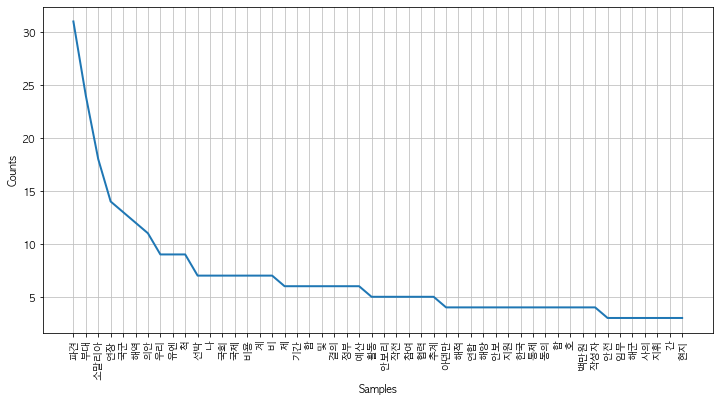

In [61]:
plt.figure(figsize=(12,6))
ko_.plot(50)                         ## 단어별로 발생빈도에 맞도록 그래프를 그린다. 

In [50]:
ko_.count('파견')                  ## 특정 단어의 발생빈도를 확인한다. 

31

In [51]:
ko_.count('소말리아')

18

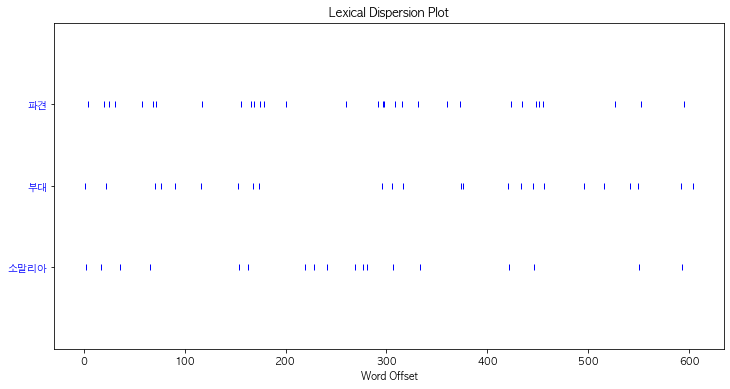

In [52]:
plt.figure(figsize=(12,6))
ko_.dispersion_plot(['파견', '부대', '소말리아'])        ## 특정 단어들의 발생하는 위치를 확인한다. 

In [53]:
ko_.concordance('소말리아')             ## 특정 단어가 있는 곳은 단어를 확인한다. 

Displaying 18 of 18 matches:
국군 부대 소말리아 해역 파견 연장 의안 의안 제출 연월일 번호 제 자 정 부 제안 
 파견 연장 의안 의안 제출 연월일 번호 제 자 정 부 제안 이유 소말리아 아덴만 해역 파견 국군 부대 청해부대 의 파견 기간 종료 예정 다
부대 의 파견 기간 종료 예정 다음 이유 파견 기간 연장 함 첫째 소말리아 해적 활동 우리 선박 안전 위협 둘째 청해부대 성공 임무 수행 우
여 국내외 관계 기관 파견 연장 요청 내용 유엔 안보리 결의 근거 소말리아 아덴만 해역 파견 국군 부대 파견 기간 장함 나 국군 부대 임무 
심의 과정 반영 추진 합 의 기획재정부 외교통상부 합의 국군 부대 소말리아 해역 파견 연장 의안 헌법 제 항의 규정 소말리아 아덴만 해역 파
합의 국군 부대 소말리아 해역 파견 연장 의안 헌법 제 항의 규정 소말리아 아덴만 해역 파견 국군 부대 파견 기간 연장 동의 국군 부대 파견
 방지 및 지원 차단 위 협력 국 협력 촉구 유엔 안보리 결의 호 소말리아 과도정부 출범 이후 무 정부 상태 지속 부터 소말리아 해역 해적 
리 결의 호 소말리아 과도정부 출범 이후 무 정부 상태 지속 부터 소말리아 해역 해적 활동 급증 선박 피랍 척 척 척 척 척 유엔 소말리아 
 소말리아 해역 해적 활동 급증 선박 피랍 척 척 척 척 척 유엔 소말리아 해적 퇴치 위해 회원 국 군함 및 항공기 참여 요청 유엔 안보리 
 합동 실 사단 파견 바레인 지부티 유엔 외국 정부 및 지역 기구 소말리아 영해 진입 연장 유엔안보리 결의 호 유엔 소말리아 해적 퇴치 위해
 및 지역 기구 소말리아 영해 진입 연장 유엔안보리 결의 호 유엔 소말리아 해적 퇴치 위해 소말리아 내 모든 조치 취할 수 승인 유엔 안보리
영해 진입 연장 유엔안보리 결의 호 유엔 소말리아 해적 퇴치 위해 소말리아 내 모든 조치 취할 수 승인 유엔 안보리 결의 호 파견 의안 국회
회 가결 부대 파견 파견 연장 의안 국회 가결 국무회의 국군 부대 소말리아 해역 파견 연장 의안 

In [54]:
from  wordcloud import WordCloud                 ## 단어들의 빈도에 따른 그래프를 그리는 모듈을 사용한다. 

In [55]:
data = ko_.vocab().most_common(150)                 ## 가장 많이 발생한 단어를 선택한다. 

In [56]:
data[:5]

[('파견', 31), ('부대', 24), ('소말리아', 18), ('연장', 14), ('국군', 13)]

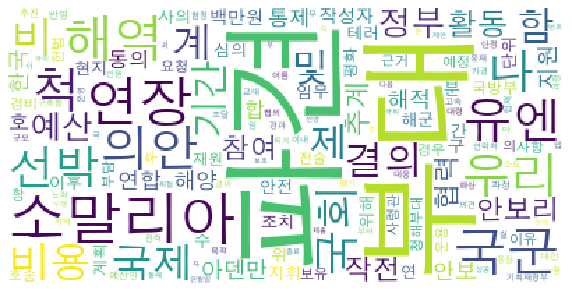

In [57]:
                                                                         ## 워드 클라우드의 객체를 만든다
wordcloud = WordCloud(font_path=path,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()